![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/b8be43cf89c540bfaf3831f2c8506614).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [169]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [170]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [171]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [150]:
# tipo de variables
print('Variables train: ')
print(dataTraining.dtypes)

Variables train: 
Price       int64
Year        int64
Mileage     int64
State      object
Make       object
Model      object
dtype: object


In [151]:
# Analisis descriptivo
print('Resumen descriptivo: ')
dataTraining.describe()


Resumen descriptivo: 


,Price,Year,Mileage
count,400000.000000,400000.000000,4.000000e+05
mean,21146.919312,2013.198125,5.507296e+04
std,10753.664940,3.292326,4.088102e+04
min,5001.000000,1997.000000,5.000000e+00
25%,13499.000000,2012.000000,2.584100e+04
50%,18450.000000,2014.000000,4.295500e+04
75%,26999.000000,2016.000000,7.743300e+04
max,79999.000000,2018.000000,2.457832e+06


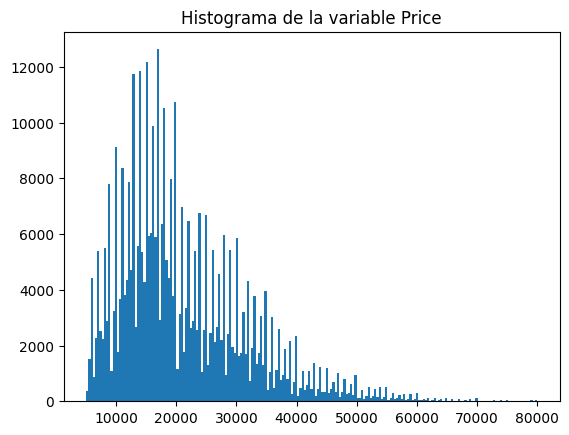

In [152]:
# Distribucion de la variable respuesta
plt.hist(dataTraining['Price'], bins='auto')
mensaje = ['Histograma de la variable Price']
plt.title(" ".join(mensaje))
plt.show()

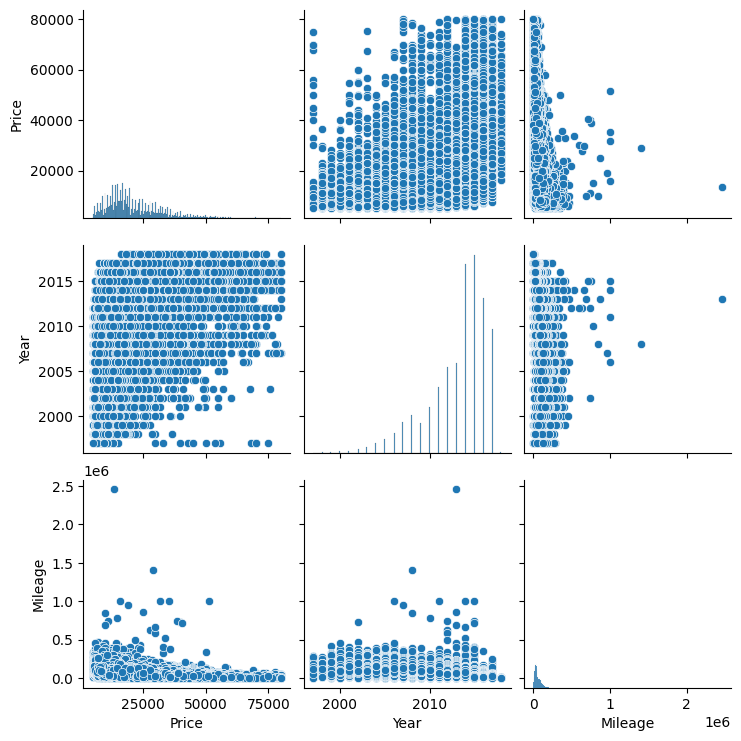

In [153]:
# Grafico de relaciones entre variables
sns.pairplot(dataTraining)

In [172]:
# Calcular el número de valores faltantes por variable
valores_faltantes_df = dataTraining.isnull().sum()

print("Valores faltantes por variable:")
variables_faltantes = valores_faltantes_df[valores_faltantes_df > 0]
print(variables_faltantes)

Valores faltantes por variable:
Series([], dtype: int64)


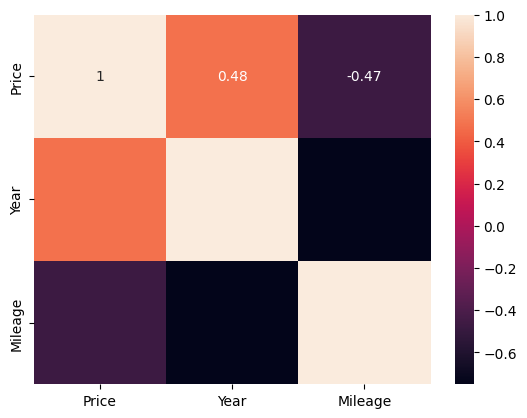

In [20]:
# Calcular la matriz de correlación
correlation_matrix = dataTraining.corr()

# Generar el mapa de calor
sns.heatmap(correlation_matrix, annot=True)

# Mostrar el mapa de calor
plt.show()


In [21]:
# Reporte descriptivo detallado

from ydata_profiling import ProfileReport

profile = ProfileReport(
    dataTraining, 
    title="Analisis exploratorio",
    #samples=None,
    #missing_diagrams=None,
    #interactions=None,
)

#profile.to_widgets()
profile.to_notebook_iframe()
#profile.to_file("Analisis exploratorio.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [173]:
# eliminar valores duplicados
df_train = dataTraining.drop_duplicates()
df_test = dataTesting

print('La dimension de los datos de entrenamiento es (filas, columnas):', df_train.shape)
print('La dimension de los datos de prueba es (filas, columnas):', df_test.shape)


La dimension de los datos de entrenamiento es (filas, columnas): (399831, 6)
La dimension de los datos de prueba es (filas, columnas): (100000, 5)


In [24]:
df_train

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler
...,...,...,...,...,...,...
399995,29900,2015,25287,TX,Lexus,RXRX
399996,17688,2015,17677,MI,Chevrolet,EquinoxFWD
399997,24907,2014,66688,NC,Buick,EnclaveLeather
399998,11498,2014,37872,IN,Volkswagen,Jetta


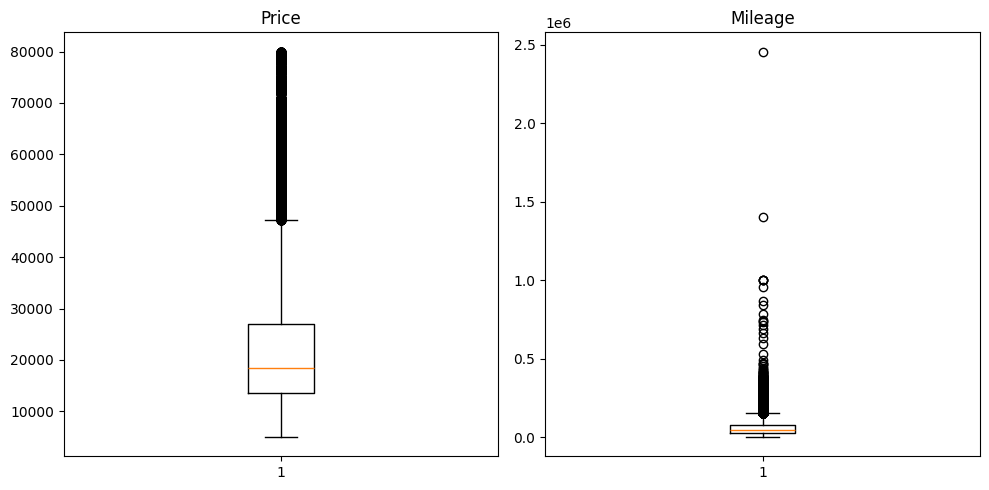

In [42]:
columnas_numericas = ['Price', 'Mileage']  # Obtiene columnas numéricas

fig, axes = plt.subplots(nrows=1, ncols=len(columnas_numericas), figsize=(10, 5))  # Ajusta el tamaño según sea necesario

for i, columna in enumerate(columnas_numericas):
    axes[i].boxplot(df_train[columna])
    axes[i].set_title(columna)  # Establecer título para cada subplot

fig.tight_layout()
plt.show()

In [174]:
from sklearn.preprocessing import StandardScaler

# Definir las variables categoricas
df_train['State'] = df_train['State'].astype('category')
df_train['Make'] = df_train['Make'].astype('category')
df_train['Model'] = df_train['Model'].astype('category')

df_test['State'] = df_test['State'].astype('category')
df_test['Make'] = df_test['Make'].astype('category')
df_test['Model'] = df_test['Model'].astype('category')


df_train.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [48]:
# Frecuenca de variables categoricas
tipos_datos = df_train.dtypes
variables_categoricas = tipos_datos[tipos_datos == 'category'].index.tolist()


for variable_categorica in variables_categoricas:
    # Calcular frecuencia para la variable actual
    frecuencias = df_train[variable_categorica].value_counts()

    # Imprimir o visualizar la frecuencia
    print(f"Frecuencias para la variable: {variable_categorica}")
    print(frecuencias)
    print("----------------------")


Frecuencias para la variable: State
 TX    45914
 CA    36512
 FL    33713
 GA    18180
 NC    17928
 IL    16788
 VA    15893
 PA    13035
 NY    12446
 NJ    12130
 OH    11364
 WA    10898
 CO    10870
 AZ    10747
 TN     9273
 MA     8586
 MD     8243
 MO     8029
 IN     7850
 KY     6688
 AL     6282
 WI     5612
 MN     5415
 MI     5326
 OK     5096
 CT     4942
 OR     4907
 SC     4814
 UT     4795
 LA     3847
 KS     3704
 NV     3332
 AR     3125
 MS     3043
 NH     2744
 NE     2522
 IA     2325
 NM     2280
 ID     1736
 DE     1221
 HI     1180
 MT      997
 ME      965
 RI      833
 AK      813
 ND      681
 WV      666
 SD      621
 VT      579
 WY      335
 DC        6
Name: State, dtype: int64
----------------------
Frecuencias para la variable: Make
Ford             62837
Chevrolet        58354
Toyota           45903
Honda            33188
Jeep             24366
GMC              20834
Kia              16341
Dodge            16158
Hyundai          15054
Lexus     

In [175]:
# las variables categoricas se dummifican
df_train_dummie = df_train.copy()
df_train_dummie = df_train_dummie.join(pd.get_dummies(df_train['Model'], prefix='Model'))
df_train_dummie = df_train_dummie.join(pd.get_dummies(df_train['Make'], prefix='Make'))
df_train_dummie = df_train_dummie.join(pd.get_dummies(df_train['State'], prefix='State'))
df_train_dummie = df_train_dummie.drop(['Model'], axis=1)
df_train_dummie = df_train_dummie.drop(['Make'], axis=1)
df_train_dummie = df_train_dummie.drop(['State'], axis=1)
df_train_dummie.head()

,Price,Year,Mileage,Model_1,Model_15002WD,Model_15004WD,Model_1500Laramie,Model_1500Tradesman,Model_200LX,Model_200Limited,...,State_ SD,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY
0,34995,2017,9913,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37895,2015,20578,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18430,2012,83716,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,24681,2014,28729,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26998,2013,64032,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
# las variables categoricas se dummifican
df_test_dummie = df_test.copy()
df_test_dummie = df_test_dummie.join(pd.get_dummies(df_test['Model'], prefix='Model'))
df_test_dummie = df_test_dummie.join(pd.get_dummies(df_test['Make'], prefix='Make'))
df_test_dummie = df_test_dummie.join(pd.get_dummies(df_test['State'], prefix='State'))
df_test_dummie = df_test_dummie.drop(['Model'], axis=1)
df_test_dummie = df_test_dummie.drop(['Make'], axis=1)
df_test_dummie = df_test_dummie.drop(['State'], axis=1)
df_test_dummie.head()

,Year,Mileage,Model_1,Model_15002WD,Model_15004WD,Model_1500Laramie,Model_1500Tradesman,Model_200LX,Model_200Limited,Model_200S,...,State_ SD,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY
ID,,,,,,,,,,,,,,,,,,,,,
0,2014,31909,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,5362,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,50300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,132160,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2015,25226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Automl

In [52]:
# Implementando h2o automl prueba de manera automatica la busqueda de parametros y el mejor algoritmo
# si se va a utilizar las compoentes principales cambiar X_train por df_ZTrain[selected_features] y X_test por df_ZTest[selected_features]
import h2o
from h2o.automl import H2OAutoML
h2o.init()

# Convert Pandas DataFrame to H2OFrame
train_frame = df_train.copy()
h2o_train_frame = h2o.H2OFrame(train_frame) 
 
# Train the AutoML model
aml = H2OAutoML(max_models=10, seed=123, sort_metric="RMSE", project_name="Precio_vehiculos" ,include_algos = ["GBM","DRF"]) 
aml.train(y='Price', training_frame=h2o_train_frame)  


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.2+13-LTS-58, mixed mode, sharing)
  Starting server from C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\USUARIO\AppData\Local\Temp\tmpt6gspq1w
  JVM stdout: C:\Users\USUARIO\AppData\Local\Temp\tmpt6gspq1w\h2o_USUARIO_started_from_python.out
  JVM stderr: C:\Users\USUARIO\AppData\Local\Temp\tmpt6gspq1w\h2o_USUARIO_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,4 months and 6 days
H2O_cluster_name:,H2O_from_python_USUARIO_d5srph
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.472 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |████████████████████████████████████████████
12:44:38.318: DRF_1_AutoML_1_20240427_123545 [DRF def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DRF model: DRF_1_AutoML_1_20240427_123545_cv_5.  Details: ERRR on field: _ntrees: The tree model will not fit in the driver node's memory (1,2 MB per tree x 50 > 52,2 MB) - try decreasing ntrees and/or max_depth or increasing min_rows!


███████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20240427_123545


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    108                108                         785673                 0            8            6.96296       1             256           189.102

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 10615766.056087226
RMSE: 3258.184472384464
MAE: 2045.2147287600105
RMSLE: 0.1365548496682542
Mean Residual Deviance: 10615766.056087226

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 11684518.743565744
RMSE: 3418.26253286165
MAE: 2144.5629791115334
RMSLE: 0.14373648941342657
Mean Residual Deviance: 11684518.743565744

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     2144.51      9.46087      2140.77       2145.39       2145.02       2158.74       2132.65
mean_residual_deviance  1.16847e+07  135358       1.17028e+07   1.17629e+07   1.16974e+07   1.18044e+07   1.14559e+07
mse                     1.16847e+07  135358       1.17028e+07   1.17629e+07   1.16974e+07   1.18044e+07   1.14559e+07
r2                      0.89892      0.00131126   0.897483      0.89829       0.898765      0.89905       0.901012
residual_deviance       1.16847e+07  135358       1.17028e+07   1.17629e+07   1.16974e+07   1.18044e+07   1.14559e+07
rmse                    3418.24      19.8564      3420.94       3429.7        3420.14       3435.75       3384.65
rmsle                   0.14374      0.000577847  0.143934      0.143815      0.14412       0.144101      0.142731

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------------  -----------------  ------------------  ------------------  -------------------
     2024-04-27 12:46:41  56.846 sec        0.0                10751.941241198132  8421.823889072564   115604240.45417725
     2024-04-27 12:46:42  57.314 sec        5.0                7566.397848661631   5796.941706276663   57250376.40423135
     2024-04-27 12:46:42  57.783 sec        10.0               5528.385127890894   4076.314029574468   30563042.12228522
     2024-04-27 12:46:43  58.253 sec        15.0               4540.663625931333   3229.2118770961984  20617626.16385588
     2024-04-27 12:46:43  58.800 sec        20.0               3878.4017844645     2631.632911902349   15042000.401737418
     2024-04-27 12:46:44  59.269 sec        25.0               3591.623807988021   2355.345024378757   12899761.578106372
     2024-04-27 12:46:44  59.722 sec        30.0               3485.283706526623   2250.87003550504    12147202.514979957
     2024-04-27 12:46:45  1 min  0.269 sec  35.0               3412.5429250545444  2177.376000530146   11645449.215339825
     2024-04-27 12:46:45  1 min  0.738 sec  40.0               3374.7557959994097  2141.6278267167486  11388976.682631608
     2024-04-27 12:46:46  1 min  1.192 sec  45.0               3352.310622794038   2121.6504109057855  11237986.51169775
---  ---                  ---               ---                ---                 ---                 ---
     2024-04-27 12:46:48  1 min  3.052 sec  65.0               3299.2133818998936  2075.2604045643857  10884808.939307334
     2024-04-27 12:46:48  1 min  3.490 sec  70.0               3291.9726525250467  2069.2339083941674  10837083.944972793
     2024-04-27 12:46:49  1 min  3.928 sec  75.0               3285.

In [79]:
# Obtener el mejor modelo de AutoML
best_model = aml.leader

# Ver los parámetros del mejor modelo
print(best_model.params)


{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_3_AutoML_1_20240427_123545', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_3_AutoML_1_20240427_123545'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240427_123545_training_Key_Frame__upload_bed6914ab3e0464c713072dfb36f4b02.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240427_123545_training_Key_Frame__upload_bed6914ab3e0464c713072dfb36f4b02.hex'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240427_123545_training_Key_Frame__upload_bed6914ab3e0464c713072dfb36f4b02.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240427_123545_training_Key_Frame__upload_bed6914ab3e0464c713072dfb36f4b02.hex'}}, 'validation_frame': {'default':

In [53]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_3_AutoML_1_20240427_123545,3418.26,1.16845e+07,2144.56,0.143736,1.16845e+07,9021,0.012676,GBM
GBM_4_AutoML_1_20240427_123545,3423.88,1.1723e+07,2137,0.14353,1.1723e+07,11022,0.010162,GBM
GBM_2_AutoML_1_20240427_123545,3425.08,1.17312e+07,2149.39,0.143829,1.17312e+07,8818,0.011204,GBM
GBM_1_AutoML_1_20240427_123545,3428.13,1.17521e+07,2145.93,0.143974,1.17521e+07,22331,0.014437,GBM
GBM_grid_1_AutoML_1_20240427_123545_model_3,3433.94,1.1792e+07,2150.96,0.144185,1.1792e+07,10085,0.010277,GBM
GBM_5_AutoML_1_20240427_123545,3434.15,1.17934e+07,2160.42,0.144421,1.17934e+07,8647,0.012375,GBM
GBM_grid_1_AutoML_1_20240427_123545_model_1,3441.88,1.18466e+07,2159.33,0.144583,1.18466e+07,7086,0.006446,GBM
GBM_grid_1_AutoML_1_20240427_123545_model_4,3486.96,1.21589e+07,2198.85,nan,1.21589e+07,19027,0.027583,GBM
GBM_grid_1_AutoML_1_20240427_123545_model_2,3488.8,1.21717e+07,2201.86,nan,1.21717e+07,14261,0.019441,GBM
XRT_1_AutoML_1_20240427_123545,7399.71,5.47557e+07,5422.97,0.321053,5.47557e+07,43457,0.013565,DRF


In [ ]:
# Convert Pandas DataFrame to H2OFrame
h2o_test_frame = h2o.H2OFrame(X_pred)
pred = aml.predict(h2o_test_frame)
h2o_test_frame['y'] = pred['predict'].round()
df_pred = h2o_test_frame.as_data_frame()
y_test = y_test.reset_index(drop=True)

# calculo de metrica
#mse=np.average(np.square(df_pred['y']-y_test))
#rmse = math.sqrt(mse)
#print("RMSE mejor modelo automl:", rmse)


In [ ]:
# Detén el servidor H2O al final
h2o.shutdown()

In [159]:
# eliminar variables que no esta en los datos a predecir 
df_train_dummie = df_train_dummie.drop('Make_Freightliner', axis=1)

# Dividir los datos en características (X) y variable objetivo (y)

X = df_train_dummie.drop('Price', axis=1)  # Excluimos la variable 'V1'
y = df_train_dummie['Price']               # Tomamos solo la variable 'V1'

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [161]:
if 'Make_Freightliner' in df_test_dummie.columns.tolist():
    print("está en la lista")
else:
    print("no está en la lista.")

no está en la lista.


### Random Forest con calibracion de parametros

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Definir los parámetros a explorar
param_grid = {
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt'],
    'n_estimators': [50, 100]
}

# Crear el modelo de Random Forest
random_forest = RandomForestRegressor(random_state=42)

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

# Ejecutar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_random_forest = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_random_forest.predict(X_test)

# Calcular RMSE y MAE
rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
mae_score = mean_absolute_error(y_test, y_pred)

print("RMSE en el conjunto de prueba:", rmse_score)
print("MAE en el conjunto de prueba:", mae_score)


Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
RMSE en el conjunto de prueba: 0.3587509815927322
MAE en el conjunto de prueba: 0.2252846456324158


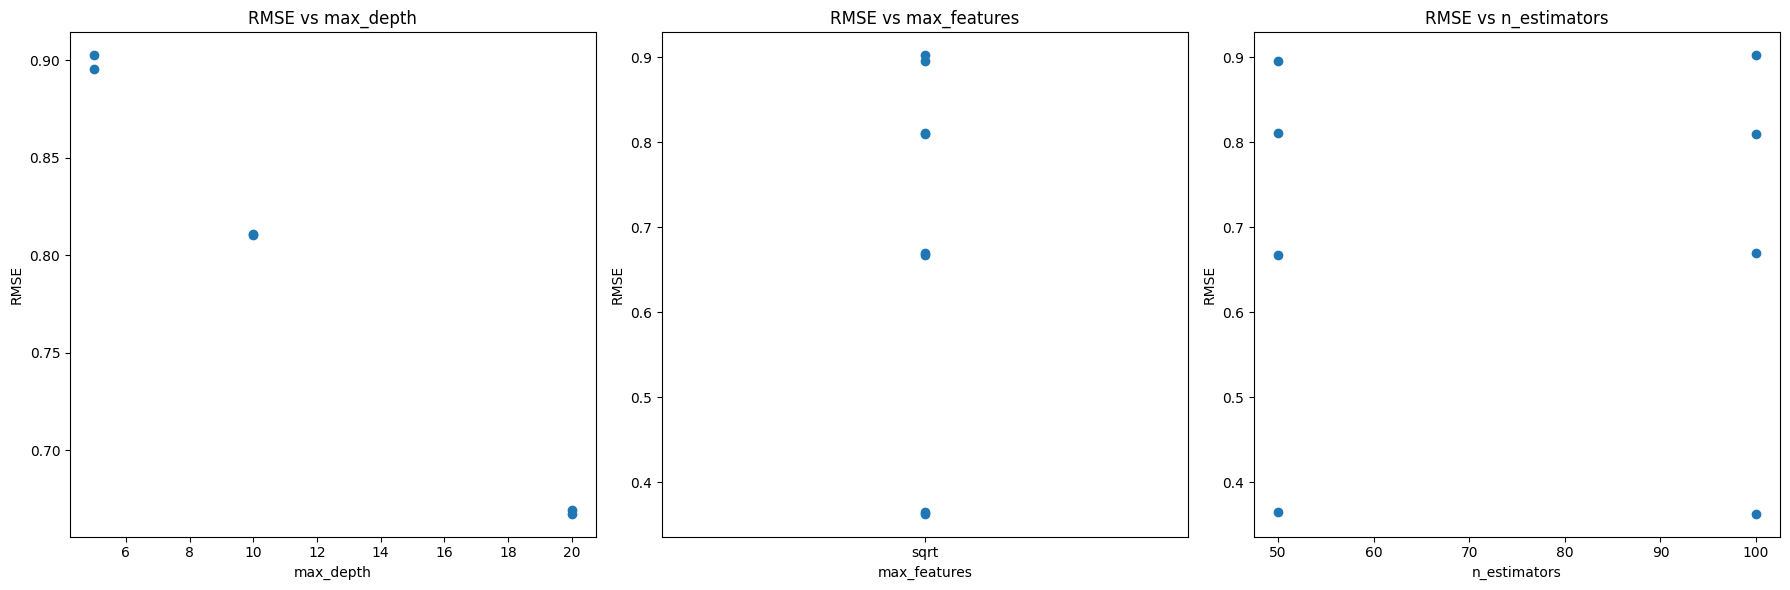

In [101]:
# Obtener los resultados de la búsqueda en cuadrícula
results = grid_search.cv_results_

# Extraer los valores de los parámetros y los puntajes de validación cruzada
param_max_depth = results['param_max_depth'].data.astype(np.float32)
param_max_features = results['param_max_features'].data
param_n_estimators = results['param_n_estimators'].data
mean_test_score = np.sqrt(-results['mean_test_score'])

# Crear subgráficos para cada parámetro
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Graficar cómo varía el RMSE con respecto a max_depth
axs[0].scatter(param_max_depth, mean_test_score)
axs[0].set_xlabel('max_depth')
axs[0].set_ylabel('RMSE')
axs[0].set_title('RMSE vs max_depth')

# Graficar cómo varía el RMSE con respecto a max_features
axs[1].scatter(param_max_features, mean_test_score)
axs[1].set_xlabel('max_features')
axs[1].set_ylabel('RMSE')
axs[1].set_title('RMSE vs max_features')

# Graficar cómo varía el RMSE con respecto a n_estimators
axs[2].scatter(param_n_estimators, mean_test_score)
axs[2].set_xlabel('n_estimators')
axs[2].set_ylabel('RMSE')
axs[2].set_title('RMSE vs n_estimators')

plt.tight_layout()
plt.show()



In [ ]:
predicciones_final =  best_random_forest.predict(df_test_dummie)
predicciones_final

# Guardar predicciones en formato exigido en la competencia de kaggle
predicciones_final.to_csv('best_random_forest.csv', index_label='ID')
predicciones_final.head()

### Gradient boosting con calibracion de parametros

In [162]:
from sklearn.ensemble import GradientBoostingRegressor

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 8],
    'subsample': [0.8, 0.4],
}

# Crear el modelo GradientBoostingRegressor
gbr_reg = GradientBoostingRegressor()

# Configurar la búsqueda en la cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=gbr_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=2)

# Realizar la búsqueda en la cuadrícula para encontrar los mejores parámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Crear un nuevo modelo GradientBoostingRegressor con los mejores parámetros encontrados
best_gbr_reg = GradientBoostingRegressor(**best_params)

# Entrenar el modelo con los mejores parámetros
best_gbr_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_gbr_reg.predict(X_test)

# Calcular métricas de evaluación
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar métricas de evaluación
print("RMSE en el conjunto de prueba:", rmse)
print("MAE en el conjunto de prueba:", mae)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....learning_rate=0.01, max_depth=5, subsample=0.8; total time= 6.0min
[CV] END .....learning_rate=0.01, max_depth=5, subsample=0.8; total time= 5.7min
[CV] END .....learning_rate=0.01, max_depth=5, subsample=0.8; total time= 5.7min
[CV] END .....learning_rate=0.01, max_depth=5, subsample=0.8; total time= 5.6min
[CV] END .....learning_rate=0.01, max_depth=5, subsample=0.8; total time= 5.7min
[CV] END .....learning_rate=0.01, max_depth=5, subsample=0.4; total time= 3.2min
[CV] END .....learning_rate=0.01, max_depth=5, subsample=0.4; total time= 3.2min
[CV] END .....learning_rate=0.01, max_depth=5, subsample=0.4; total time= 3.2min
[CV] END .....learning_rate=0.01, max_depth=5, subsample=0.4; total time= 3.7min
[CV] END .....learning_rate=0.01, max_depth=5, subsample=0.4; total time= 3.6min
[CV] END .....learning_rate=0.01, max_depth=8, subsample=0.8; total time= 9.4min
[CV] END .....learning_rate=0.01, max_depth=8, su

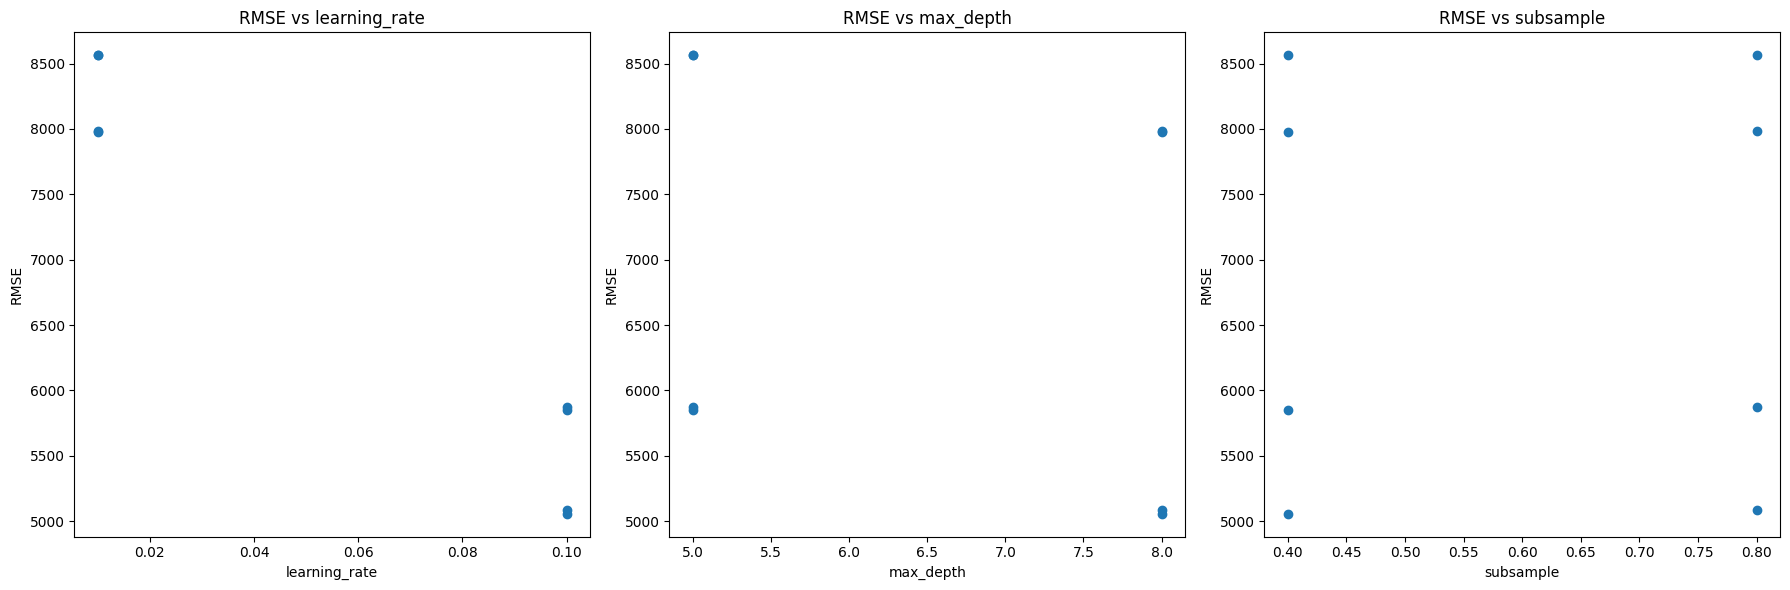

In [164]:
# Obtener los resultados de la búsqueda en cuadrícula
results = grid_search.cv_results_

# Extraer los valores de los parámetros y los puntajes de validación cruzada
param_learning_rate = results['param_learning_rate'].data.astype(np.float32)
param_max_depth = results['param_max_depth'].data
param_subsample = results['param_subsample'].data
mean_test_score = np.sqrt(-results['mean_test_score'])

# Crear subgráficos para cada parámetro
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Graficar cómo varía el RMSE con respecto a learning_rate
axs[0].scatter(param_learning_rate, mean_test_score)
axs[0].set_xlabel('learning_rate')
axs[0].set_ylabel('RMSE')
axs[0].set_title('RMSE vs learning_rate')

# Graficar cómo varía el RMSE con respecto a max_depth
axs[1].scatter(param_max_depth, mean_test_score)
axs[1].set_xlabel('max_depth')
axs[1].set_ylabel('RMSE')
axs[1].set_title('RMSE vs max_depth')

# Graficar cómo varía el RMSE con respecto a subsample
axs[2].scatter(param_subsample, mean_test_score)
axs[2].set_xlabel('subsample')
axs[2].set_ylabel('RMSE')
axs[2].set_title('RMSE vs subsample')

plt.tight_layout()
plt.show()

In [177]:
predicciones_final =  best_gbr_reg.predict(df_test_dummie)
predicciones_final = pd.DataFrame(predicciones_final, columns=['Price'])

# Guardar predicciones en formato exigido en la competencia de kaggle
predicciones_final.to_csv('best_best_gbr_reg.csv', index_label='ID')
predicciones_final.head()

,Price
0,21279.985651
1,35305.452396
2,21085.585163
3,10319.540884
4,26438.176808


### Random forest

In [179]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Crear el modelo de Random Forest
random_forest = RandomForestRegressor(random_state=42)

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular RMSE y MAE
rmse_score = mean_squared_error(y_test, y_pred, squared=False)
mae_score = mean_absolute_error(y_test, y_pred)

print("RMSE en el conjunto de prueba:", rmse_score)
print("MAE en el conjunto de prueba:", mae_score)

RMSE en el conjunto de prueba: 3783.704694619411
MAE en el conjunto de prueba: 2351.8885803450867


In [180]:
predicciones_final =  random_forest.predict(df_test_dummie)
predicciones_final = pd.DataFrame(predicciones_final, columns=['Price'])

# Guardar predicciones en formato exigido en la competencia de kaggle
predicciones_final.to_csv('random_forest.csv', index_label='ID')
predicciones_final.head()

,Price
0,21737.93
1,34444.73
2,24060.12
3,7849.95
4,29997.34


In [182]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Crear y entrenar el modelo XGBoost de regresión
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_reg.predict(X_test)

# Calcular métricas de evaluación
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar métricas de evaluación
print("RMSE en el conjunto de prueba:", rmse)
print("MAE en el conjunto de prueba:", mae)

RMSE en el conjunto de prueba: 4301.00253651715
MAE en el conjunto de prueba: 3061.041876953199


In [183]:
predicciones_final =  xgb_reg.predict(df_test_dummie)
predicciones_final = pd.DataFrame(predicciones_final, columns=['Price'])

# Guardar predicciones en formato exigido en la competencia de kaggle
predicciones_final.to_csv('xgb_reg.csv', index_label='ID')
predicciones_final.head()

,Price
0,22126.773438
1,36152.398438
2,21066.015625
3,9198.000977
4,29015.281250


In [185]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Crear y entrenar el modelo XGBoost de regresión
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = gbr.predict(X_test)

# Calcular métricas de evaluación
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar métricas de evaluación
print("RMSE en el conjunto de prueba:", rmse)
print("MAE en el conjunto de prueba:", mae)

RMSE en el conjunto de prueba: 6696.679391496779
MAE en el conjunto de prueba: 5094.356320365413


In [ ]:
predicciones_final =  gbr.predict(df_test_dummie)
predicciones_final = pd.DataFrame(predicciones_final, columns=['Price'])

# Guardar predicciones en formato exigido en la competencia de kaggle
predicciones_final.to_csv('gbr.csv', index_label='ID')
predicciones_final.head()

#### ejemplo archivo

In [102]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [103]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033
